In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

<h2>D-розбиття</h2>

In [3]:
w_positive = np.logspace(-3, 3, 500)
w = np.concatenate((-np.flip(w_positive), w_positive))

Re = np.zeros_like(w)
Im = np.zeros_like(w)

In [4]:
for i in range(len(w)):
    s = 1j * w[i]
    W = 1 / (s + 2 - 1.5 * np.exp(-s))
    Z = -1 / W
    Re[i] = np.real(Z)
    Im[i] = np.imag(Z)

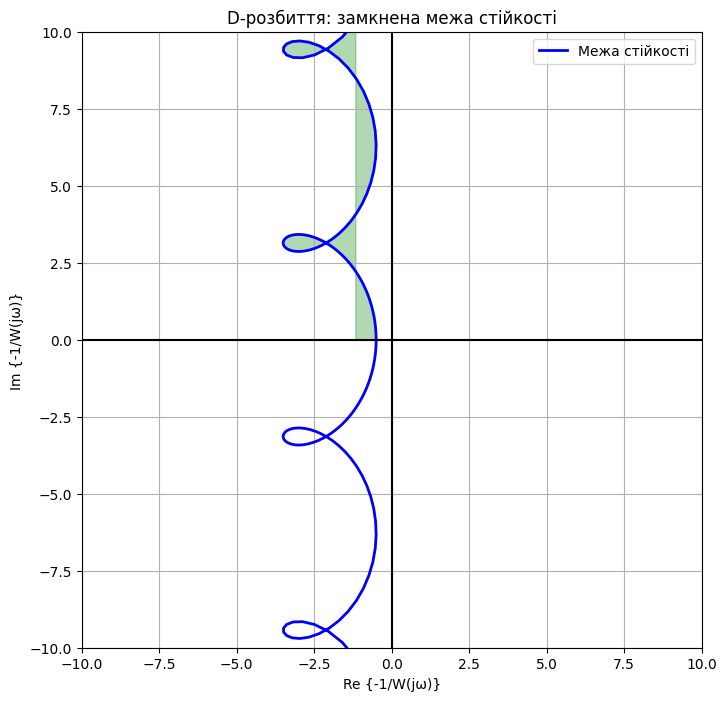

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(Re, Im, 'b-', linewidth=2, label='Межа стійкості')
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid(True)

plt.xlabel('Re {-1/W(jω)}')
plt.ylabel('Im {-1/W(jω)}')
plt.title('D-розбиття: замкнена межа стійкості')
plt.axis([-10, 10, -10, 10])

plt.fill_between(Re, Im, where=(Im >= 0), color='green', alpha=0.3)

plt.legend()
plt.show()

<h2>Корені квазіполінома</h2>

In [7]:
def char_eq(vec):
    lmbda = vec[0] + 1j * vec[1]
    val = lmbda + 2 - 1.5 * np.exp(-lmbda)
    return [np.real(val), np.imag(val)]

In [8]:
real_vals = np.linspace(-2, 2, 10)
imag_vals = np.linspace(-10, 10, 20)

initial_guesses = [[r, i] for r in real_vals for i in imag_vals]

In [9]:
roots = []
for guess in initial_guesses:
    sol = root(char_eq, guess)
    if sol.success:
        z = sol.x[0] + 1j * sol.x[1]
        if all(abs(z - r) > 1e-3 for r in roots):
            roots.append(z)

roots_sorted = sorted(roots, key=lambda x: x.real, reverse=True)

print("Знайдені корені характеристичного рівняння:")
for r in roots_sorted:
    print(f"{r.real:.4f} {'+' if r.imag >= 0 else '-'} {abs(r.imag):.4f}j")

Знайдені корені характеристичного рівняння:
-0.1886 + 0.0000j
-1.1925 - 4.8765j
-1.1925 + 4.8765j
-1.9921 + 10.9963j
-1.9921 - 10.9963j


Дійсна частина усіх коренів від’ємна, отже вони не викликають нестійкість.